In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [00:10<00:00, 211MB/s]
100% 1.72G/1.72G [00:10<00:00, 178MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dermnet.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
#generators (to divide data into batches - too many images !)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256) # making every image size same
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256) # making every image size same
)

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


In [10]:
# writing down some explanations in comments
# validation for testing
# we have stored the images in numpy array
# numpy array values range from 0 to 255 , we need to bring that down to 0 to 1
# Normalize

def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#using map to take each image and label,perform the transformation and return
#we are doing this because we want all pixels to be in the range 0 to 1
#now , data is ready

In [11]:
# create CNN model
# we will make an architecture where we will have three convolution layers - 
# first layer -  32 filters
# second layer - 64 filters
# third layer - 128 filters

model = Sequential()
#first layer
#pooling layer
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [13]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy']) #have adoubt , donno if its binary or categorical 


In [14]:
history = model.fit(train_ds,epochs = 10,validation_data=validation_ds)

Epoch 1/10
487/487 [==============================] - 77s 137ms/step - loss: 0.0000e+00 - accuracy: 0.0740 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 2/10
487/487 [==============================] - 73s 148ms/step - loss: 0.0000e+00 - accuracy: 0.0739 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 3/10
487/487 [==============================] - 62s 126ms/step - loss: 0.0000e+00 - accuracy: 0.0739 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 4/10
487/487 [==============================] - 63s 128ms/step - loss: 0.0000e+00 - accuracy: 0.0739 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 5/10
487/487 [==============================] - 62s 126ms/step - loss: 0.0000e+00 - accuracy: 0.0739 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 6/10
487/487 [==============================] - 61s 123ms/step - loss: 0.0000e+00 - accuracy: 0.0739 - val_loss: 0.0000e+00 - val_accuracy: 0.0720
Epoch 7/10
487/487 [==============================] - 99s 203ms/step - loss: 0.000

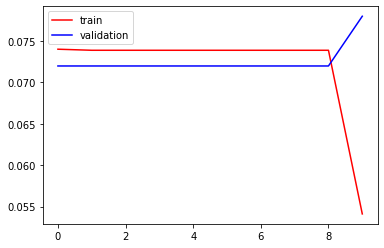

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

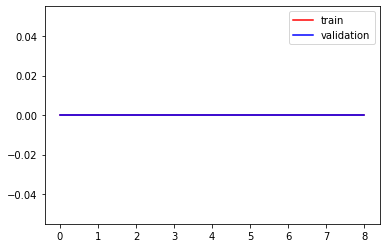

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()